In [1]:
using Pkg
Pkg.add("DifferentialEquations")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %13.6 %>                             ]  27.1 %>                     ]  46.9 % [=========================>               ]  60.4 %>            ]  69.8 % [==================================>      ]  83.4 %Fetching: [=======================================> ]  95.1 % Resolving package versions...
 Installed Calculus ──────────────────── v0.5.0
 Installed DiffEqJump ────────────────── v6.2.2
 Installed DifferentialEquations ─────── v6.8.0
 Installed DiffRules ─────────────────── v0.0.10
 Installed Parameters ────────────────── v0.12.0
 Installed BinDeps ───────────────────── v0.8.10
 Installed DelayDiffEq ───────────────── v5.17.0
 Installed DiffEqBase ────────────────── v6.4.2
 Installed ArnoldiMethod ─────────────── v0.0.4
 Installed PoissonRandom ─────────────── v0.4.0
 Installed MacroTools ────────────

  Building Sundials ────────→ `~/.julia/packages/Sundials/fVIue/deps/build.log`
  Building SpecialFunctions → `~/.julia/packages/SpecialFunctions/ne2iw/deps/build.log`


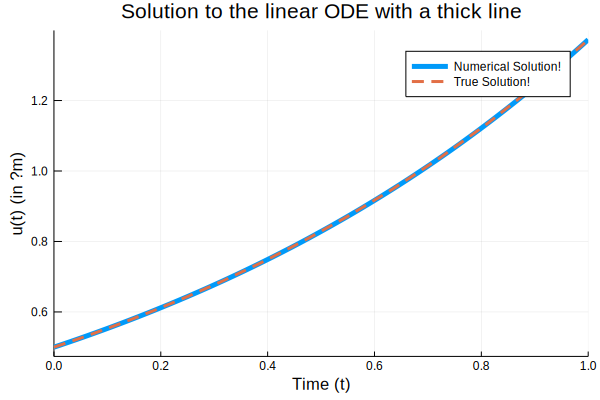

In [4]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="Numerical Solution!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

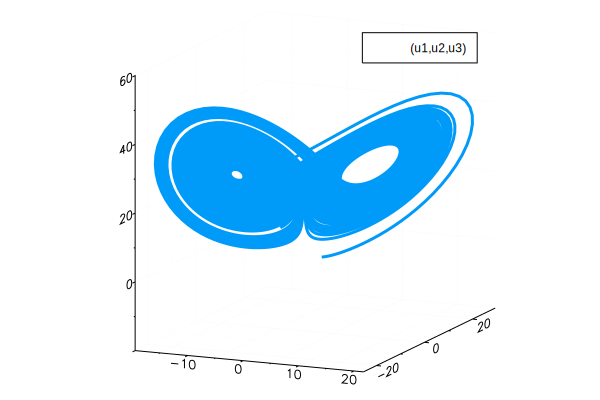

In [7]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

u0 = [1.0;5.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)

plot(sol,vars=(1,2,3))

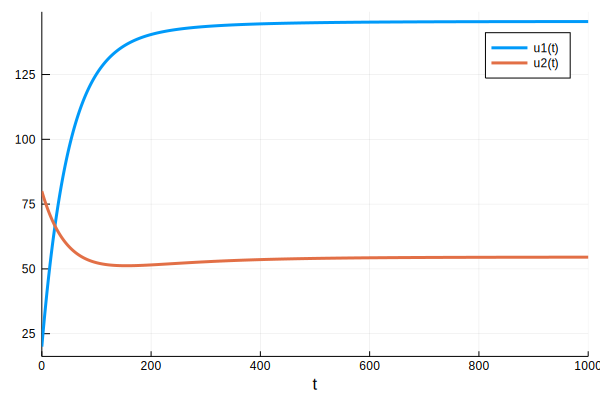

In [12]:
# http://tutorial.math.lamar.edu/Classes/DE/SystemsModeling.aspx

# Two 1000 liter tanks are with salt water. Tank 1 contains 800 liters 
# of water initially containing 20 grams of salt dissolved in it and tank 2 
# contains 1000 liters of water and initially has 80 grams of salt dissolved in it. 
# Salt water with a concentration of ½ gram/liter of salt enters tank 1 at a rate of 
# 4 liters/hour. Fresh water enters tank 2 at a rate of 7 liters/hour. 
# Through a connecting pipe water flows from tank 2 into tank 1 at a rate of 10 liters/hour. 
# Through a different connecting pipe 14 liters/hour flows out of tank 1 and 11 liters/hour 
# are drained out of the pipe (and hence out of the system completely) and only 3 liters/hour 
# flows back into tank 2. Set up the system that will give the amount of salt in each 
# tank at any given time.



function tanks!(du,u,p,t)
 du[1] = 4.0 * 0.5 + 10.0 * (u[2] / 1000.0) - 14.0 * (u[1] / 800.0)
 du[2] = 7.0 * 0.0 + 3.0 * (u[1] / 800.0) - 10.0 * (u[2] / 1000.0)
end

u0 = [20.0; 80.0]
tspan = (0.0,1000.0)
prob = ODEProblem(tanks!,u0,tspan)
sol = solve(prob)

plot(sol)